In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('beforward_toyota_detailed.csv')

In [4]:
df.head(5)

,Car Make,Location,Chassis No,Version/Class,Model Code,Milleage,Engine Size (CC),Engine Code,Drive,Steering,Transmission,External Color,Registration Year/Month,Fuel,Manufacture Year/Month,Price($)
0,MITSUBISHI OUTLANDER,U.S.A,JA4AP4AU4KU013185,Sport SE FWD,4Cyl\nFind parts for this model code,"7,079 mile","2,000cc",-,2wheel drive,Left,Automatic,Red,2019/-,Petrol,2019/0,18080.0
1,MITSUBISHI LANCER,U.S.A,JA32U2FU8GU010814,ES FWD,4Cyl\nFind parts for this model code,"70,981 mile","2,400cc",-,2wheel drive,Left,CVT,Gray,2016/-,Petrol,2016/0,10398.0
2,MITSUBISHI DELICA D,OSAKA,CV1W-1112623,2.2D POWER PACKAGE 4WD,LDA-CV1W\nFind parts for this model code,"39,236 km","2,267cc",4N14,4wheel drive,Right,Automatic,Pearl,2017/3,Diesel,-,29030.0
3,MITSUBISHI ASX,UNITED KINGDOM,JMF1136,MANUAL DIESEL,0,"28,000 mile","1,800cc",-,4wheel drive,Right,Manual,White,2015/9,Diesel,-,12900.0
4,MITSUBISHI ASX,UNITED KINGDOM,JMF1137,MANUAL DIESEL,0,"32,161 mile","1,800cc",-,4wheel drive,Right,Manual,Silver,2015/1,Diesel,-,14200.0


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df = df.sort_values('price($)')

In [7]:
df.columns

Index(['car make', 'location', 'chassis no', 'version/class', 'model code',
       'milleage', 'engine size (cc)', 'engine code', 'drive', 'steering',
       'transmission', 'external color', 'registration year/month', 'fuel',
       'manufacture year/month', 'price($)'],
      dtype='object')

In [8]:
df

,car make,location,chassis no,version/class,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,VE,DBF-VY12\nFind parts for this model code,"69,464 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/3,Petrol,2014/12,2040.0
403,NISSAN AD VAN,KYUSHU,VY12-192189,VE,DBF-VY12\nFind parts for this model code,"223,428 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2079.0
402,NISSAN AD VAN,KYUSHU,VY12-192099,VE,DBF-VY12\nFind parts for this model code,"174,808 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2177.0
401,NISSAN AD VAN,KYUSHU,VY12-192804,NaN,DBF-VY12\nFind parts for this model code,"106,224 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/8,2177.0
409,NISSAN MARCH,YOKOHAMA,NK13-016941,X FOUR V SELECTION,DBA-NK13\nFind parts for this model code,"80,203 km","1,190cc",HR12,4wheel drive,Right,Automatic,Silver,2017/6,Petrol,-,2501.0
1518,TOYOTA PROBOX VAN,NAGOYA,NSP160-0008909,DX COMFORT PACKAGE,DBE-NSP160V\nFind parts for this model code,"100,671 km","1,320cc",1NR,-,Right,Automatic,Yellow,2015/8,Petrol,2015/6,3011.0
466,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,DX HIGHROOF,HBD-DR64V\nFind parts for this model code,"131,435 km",650cc,K6A,2wheel drive,Right,Automatic,Silver,2015/5,Petrol,-,3108.0
465,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,DX HIGHROOF,HBD-DR64V\nFind parts for this model code,"131,474 km",650cc,K6A,2wheel drive,Right,Automatic,White,2015/4,Petrol,-,3108.0
1507,TOYOTA SUCCEED VAN,KYUSHU,NCP160-0021387,U,DBE-NCP160V\nFind parts for this model code,"89,071 km","1,490cc",1NZ,-,Right,Automatic,White,2015/6,Petrol,2015/5,3275.0
1514,TOYOTA PROBOX VAN,NAGOYA,NSP160-0009198,DX,DBE-NSP160V\nFind parts for this model code,"93,640 km","1,320cc",1NR,-,Right,Automatic,Silver,2015/7,Petrol,2015/7,3354.0


In [9]:
len(df.index)

2899

In [10]:
df.iloc[:2,:]

,car make,location,chassis no,version/class,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,VE,DBF-VY12\nFind parts for this model code,"69,464 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/3,Petrol,2014/12,2040.0
403,NISSAN AD VAN,KYUSHU,VY12-192189,VE,DBF-VY12\nFind parts for this model code,"223,428 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2079.0


In [11]:
df_copy = df
np.sum(df_copy.isnull())

car make                     0
location                     0
chassis no                   0
version/class              538
model code                   0
milleage                     0
engine size (cc)             0
engine code                  0
drive                        0
steering                     0
transmission                 1
external color               1
registration year/month      1
fuel                         1
manufacture year/month       1
price($)                     1
dtype: int64

In [12]:
# drop version/class column
df_copy = df_copy.drop('version/class', axis=1)
np.sum(df_copy.isnull())

car make                   0
location                   0
chassis no                 0
model code                 0
milleage                   0
engine size (cc)           0
engine code                0
drive                      0
steering                   0
transmission               1
external color             1
registration year/month    1
fuel                       1
manufacture year/month     1
price($)                   1
dtype: int64

In [13]:
df_copy.tail(1)

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
2838,TOYOTA TOYOTA OTHERS,YOKOHAMA,8FD80-10591,8FD60\nFind parts for this model code,Diesel,"3,000cc",Automatic,2018,55148,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_clean = df_copy[np.isfinite(df_copy['price($)'])]
df_clean

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($)
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12\nFind parts for this model code,"69,464 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/3,Petrol,2014/12,2040.0
403,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12\nFind parts for this model code,"223,428 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2079.0
402,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12\nFind parts for this model code,"174,808 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/7,2177.0
401,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12\nFind parts for this model code,"106,224 km","1,490cc",HR15,2wheel drive,Right,Automatic,White,2015/9,Petrol,2015/8,2177.0
409,NISSAN MARCH,YOKOHAMA,NK13-016941,DBA-NK13\nFind parts for this model code,"80,203 km","1,190cc",HR12,4wheel drive,Right,Automatic,Silver,2017/6,Petrol,-,2501.0
1518,TOYOTA PROBOX VAN,NAGOYA,NSP160-0008909,DBE-NSP160V\nFind parts for this model code,"100,671 km","1,320cc",1NR,-,Right,Automatic,Yellow,2015/8,Petrol,2015/6,3011.0
466,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V\nFind parts for this model code,"131,435 km",650cc,K6A,2wheel drive,Right,Automatic,Silver,2015/5,Petrol,-,3108.0
465,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V\nFind parts for this model code,"131,474 km",650cc,K6A,2wheel drive,Right,Automatic,White,2015/4,Petrol,-,3108.0
1507,TOYOTA SUCCEED VAN,KYUSHU,NCP160-0021387,DBE-NCP160V\nFind parts for this model code,"89,071 km","1,490cc",1NZ,-,Right,Automatic,White,2015/6,Petrol,2015/5,3275.0
1514,TOYOTA PROBOX VAN,NAGOYA,NSP160-0009198,DBE-NSP160V\nFind parts for this model code,"93,640 km","1,320cc",1NR,-,Right,Automatic,Silver,2015/7,Petrol,2015/7,3354.0


In [15]:
np.sum(df_clean.isnull())

car make                   0
location                   0
chassis no                 0
model code                 0
milleage                   0
engine size (cc)           0
engine code                0
drive                      0
steering                   0
transmission               0
external color             0
registration year/month    0
fuel                       0
manufacture year/month     0
price($)                   0
dtype: int64

In [16]:
len(df_clean.index)

2898

In [17]:
# functions to clean columns of the data frame
def getMakes(str_list):
    return str_list.strip().split(' ')[0]
     
def cleanYear(year):
    try:
        return int(str(year)[:4])
    except:
        return 0

def cleanModelCode(code):
    return code.strip().split('\n')[0]
   
def getIntFromString(val):
    try:
        temp = re.findall('\d+', val)
        temp = ''.join(temp)
        return int(temp)
    except:
        return 0
    
def removeSpaces(str_val):
    return str_val.strip()

In [141]:
df_clean.head(20)

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration_year,fuel,manufacture_year,price,makes
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12,69464,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2014,2040.0,NISSAN
403,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12,223428,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2079.0,NISSAN
402,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12,174808,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2177.0,NISSAN
401,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12,106224,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2177.0,NISSAN
409,NISSAN MARCH,YOKOHAMA,NK13-016941,DBA-NK13,80203,1190,HR12,4wheel drive,Right,Automatic,Silver,2017,Petrol,0,2501.0,NISSAN
466,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V,131435,650,K6A,2wheel drive,Right,Automatic,Silver,2015,Petrol,0,3108.0,NISSAN
465,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V,131474,650,K6A,2wheel drive,Right,Automatic,White,2015,Petrol,0,3108.0,NISSAN
1519,TOYOTA PROBOX VAN,KYUSHU,NCP160-0053628,DBE-NCP160V,91750,1490,1NZ,2wheel drive,Right,Automatic,Blue,2016,Petrol,2016,3427.0,TOYOTA
979,NISSAN CLIPPER,KOBE,DR64V-810526,HBD-DR64V,166000,650,K6A,2wheel drive,Right,Automatic,Silver,2015,Petrol,0,3579.0,NISSAN
680,NISSAN CLIPPER,YOKOHAMA,DR17V-105012,HBD-DR17V,115958,650,R06A,2wheel drive,Right,Automatic,White,2015,Petrol,0,4118.0,NISSAN


In [20]:
# clean columns values
df_clean[['registration year/month']] = df_clean[['registration year/month']].applymap(cleanYear)
df_clean[['manufacture year/month']] = df_clean[['manufacture year/month']].applymap(cleanYear)
df_clean['makes'] = df_clean['car make'].apply(getMakes)
df_clean['model code'] = df_clean['model code'].apply(cleanModelCode)
df_clean['milleage'] = df_clean['milleage'].apply(getIntFromString)
df_clean['engine size (cc)'] = df_clean['engine size (cc)'].apply(getIntFromString)
df_clean['car make'] = df_clean['car make'].apply(removeSpaces)
df_clean.head(100)

/Users/babu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,registration year/month,fuel,manufacture year/month,price($),makes
408,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12,69464,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2014,2040.0,NISSAN
403,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12,223428,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2079.0,NISSAN
402,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12,174808,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2177.0,NISSAN
401,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12,106224,1490,HR15,2wheel drive,Right,Automatic,White,2015,Petrol,2015,2177.0,NISSAN
409,NISSAN MARCH,YOKOHAMA,NK13-016941,DBA-NK13,80203,1190,HR12,4wheel drive,Right,Automatic,Silver,2017,Petrol,0,2501.0,NISSAN
1518,TOYOTA PROBOX VAN,NAGOYA,NSP160-0008909,DBE-NSP160V,100671,1320,1NR,-,Right,Automatic,Yellow,2015,Petrol,2015,3011.0,TOYOTA
466,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V,131435,650,K6A,2wheel drive,Right,Automatic,Silver,2015,Petrol,0,3108.0,NISSAN
465,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V,131474,650,K6A,2wheel drive,Right,Automatic,White,2015,Petrol,0,3108.0,NISSAN
1507,TOYOTA SUCCEED VAN,KYUSHU,NCP160-0021387,DBE-NCP160V,89071,1490,1NZ,-,Right,Automatic,White,2015,Petrol,2015,3275.0,TOYOTA
1514,TOYOTA PROBOX VAN,NAGOYA,NSP160-0009198,DBE-NSP160V,93640,1320,1NR,-,Right,Automatic,Silver,2015,Petrol,2015,3354.0,TOYOTA


In [21]:
df_clean = df_clean[df_clean['engine size (cc)'] >= 600]
df_clean = df_clean[df_clean['drive'] != '-']
df_clean = df_clean[df_clean['fuel'] != 'Other']
df_clean = df_clean[df_clean['external color'] != 'Other']

In [22]:
make_group = df_clean.groupby('makes')

HONDA
----------------------------------------------------------------------
376


MITSUBISHI
----------------------------------------------------------------------
394


NISSAN
----------------------------------------------------------------------
683


TOYOTA
----------------------------------------------------------------------
1308




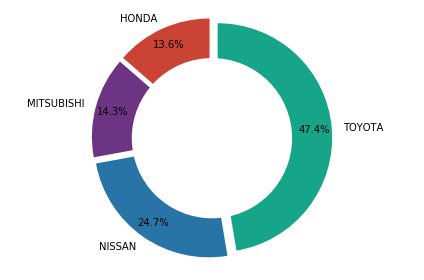

[0.05, 0.05, 0.05, 0.05]

In [23]:
labels = []
sizes = []
for key, values in make_group:
    print(key) #this indicates the grouping
    labels.append(key)
    sizes.append(values.shape[0])
    print('-'*70)
#     print(values) #this is a dataframe for that 
    print(values.shape[0])
    print('\n')

# Pie chart
colors = ['#CB4335','#6C3483','#2874A6','#17A589']
def drawPieChart(labels, sizes, colors):  
#     explode = (0.05,0.05,0.05,0.05)
    explode = list(map(lambda c: float(c) ,('0.05 ' * len(sizes)).strip().split(' ')))

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    
drawPieChart(labels,sizes,colors)

list(map(lambda c: float(c) ,('0.05 ' * len(sizes)).strip().split(' ')))

2015
----------------------------------------------------------------------
724


2016
----------------------------------------------------------------------
725


2017
----------------------------------------------------------------------
632


2018
----------------------------------------------------------------------
462


2019
----------------------------------------------------------------------
218




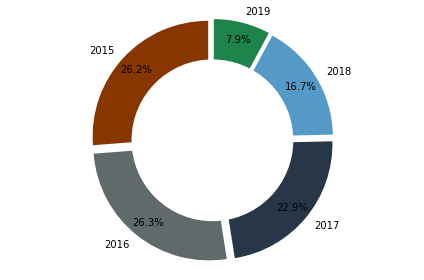

In [24]:
year_group = df_clean.groupby('registration year/month')
year_labels = []
year_sizes = []
for key, values in year_group:
    print(key) #this indicates the grouping
    year_labels.append(key)
    year_sizes.append(values.shape[0])
    print('-'*70)
    print(values.shape[0])
    print('\n')
    
year_colors = ['#873600', '#5F6A6A','#283747','#5499C7','#1E8449']
drawPieChart(year_labels, year_sizes, year_colors)

In [38]:
(df.sort_values('price($)')).iloc[0,-1]

2040.0

In [41]:
# renaming columns
df_clean.rename(columns = {'milleage (km)' :'milleage', 'registration year/month' : 'registration_year',\
                          'manufacture year/month' :'manufacture_year', 'price($)': 'price'}, inplace=True)
df_clean.columns

Index(['car make', 'location', 'chassis no', 'model code', 'milleage',
       'engine size (cc)', 'engine code', 'drive', 'steering', 'transmission',
       'external color', 'registration_year', 'fuel', 'manufacture_year',
       'price', 'makes'],
      dtype='object')

In [140]:
%matplotlib inline
df_time_series = df_clean
df_time_series = df_time_series.set_index('registration_year')


locations = df_clean['location']
locations = locations.unique()

In [46]:
df_time_series.loc[2015]

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,fuel,manufacture_year,price,makes
registration_year,,,,,,,,,,,,,,,
2015,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12,69464,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2014,2040.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12,223428,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2079.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12,174808,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2177.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12,106224,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2177.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V,131435,650,K6A,2wheel drive,Right,Automatic,Silver,Petrol,0,3108.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V,131474,650,K6A,2wheel drive,Right,Automatic,White,Petrol,0,3108.0,NISSAN
2015,NISSAN CLIPPER,KOBE,DR64V-810526,HBD-DR64V,166000,650,K6A,2wheel drive,Right,Automatic,Silver,Petrol,0,3579.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR17V-105012,HBD-DR17V,115958,650,R06A,2wheel drive,Right,Automatic,White,Petrol,0,4118.0,NISSAN
2015,NISSAN DAYZ,YOKOHAMA,B21W-0225407,DBA-B21W,27743,650,3B20,2wheel drive,Right,Automatic,Silver,Petrol,0,4314.0,NISSAN


In [47]:
df_time_series.loc[2019].groupby('location').size()

location
Dubai              12
INCHON              4
KOBE                7
KYUSHU              5
NAGOYA              5
OSAKA              13
Thailand           39
U.S.A             112
UNITED KINGDOM     10
YOKOHAMA           11
dtype: int64

In [48]:
df50 = df_clean.head(50)

In [53]:
df_time_series[df_time_series['price'] <= 12000]

,car make,location,chassis no,model code,milleage,engine size (cc),engine code,drive,steering,transmission,external color,fuel,manufacture_year,price,makes
registration_year,,,,,,,,,,,,,,,
2015,NISSAN AD VAN,YOKOHAMA,VY12-182589,DBF-VY12,69464,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2014,2040.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192189,DBF-VY12,223428,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2079.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192099,DBF-VY12,174808,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2177.0,NISSAN
2015,NISSAN AD VAN,KYUSHU,VY12-192804,DBF-VY12,106224,1490,HR15,2wheel drive,Right,Automatic,White,Petrol,2015,2177.0,NISSAN
2017,NISSAN MARCH,YOKOHAMA,NK13-016941,DBA-NK13,80203,1190,HR12,4wheel drive,Right,Automatic,Silver,Petrol,0,2501.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR64V-809202,HBD-DR64V,131435,650,K6A,2wheel drive,Right,Automatic,Silver,Petrol,0,3108.0,NISSAN
2015,NISSAN CLIPPER,YOKOHAMA,DR64V-803097,HBD-DR64V,131474,650,K6A,2wheel drive,Right,Automatic,White,Petrol,0,3108.0,NISSAN
2016,TOYOTA PROBOX VAN,KYUSHU,NCP160-0053628,DBE-NCP160V,91750,1490,1NZ,2wheel drive,Right,Automatic,Blue,Petrol,2016,3427.0,TOYOTA
2015,NISSAN CLIPPER,KOBE,DR64V-810526,HBD-DR64V,166000,650,K6A,2wheel drive,Right,Automatic,Silver,Petrol,0,3579.0,NISSAN


Text(0.5, 1.0, 'Scatter Plot of Price vs Mileage')

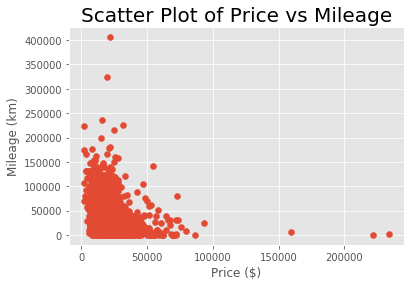

In [54]:
plt.scatter(df_clean['price'], df_clean['milleage'])
plt.xlabel('Price ($)')
plt.ylabel('Mileage (km)')
plt.title('Scatter Plot of Price vs Mileage', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Engine Capacity')

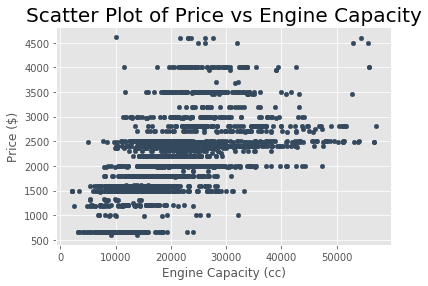

In [55]:
# removing outliers
scatter_engine_df = df_clean[['price','engine size (cc)']]
scatter_engine_df = scatter_engine_df.loc[scatter_engine_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

scatter_engine_df.plot(kind='scatter',x='price', y='engine size (cc)', c='#34495E')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Engine Capacity', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Engine Capacity')

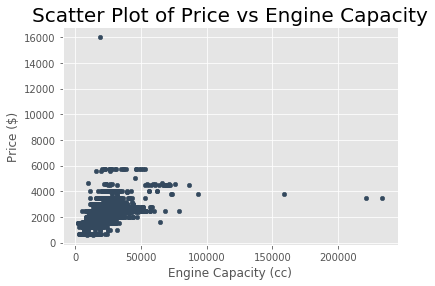

In [56]:
df_clean.plot(kind='scatter',x='price', y='engine size (cc)', c='#34495E')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Engine Capacity', fontsize=20)

In [57]:
# removing outliers
scatter_df = df_clean[['price','milleage']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

Text(0.5, 1.0, 'Scatter Plot of Price vs Mileage')

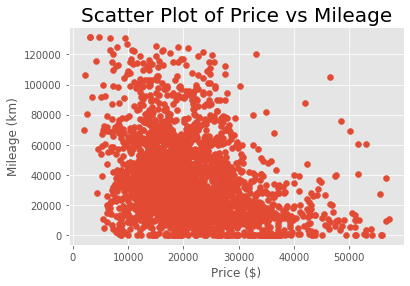

In [58]:
plt.scatter(scatter_df['price'], scatter_df['milleage'])
plt.xlabel('Price ($)')
plt.ylabel('Mileage (km)')
plt.title('Scatter Plot of Price vs Mileage', fontsize=20)

In [59]:
outliers = df_clean[['price', 'milleage']].dropna()

In [60]:
outliers.shape

(2761, 2)

In [61]:
outliers = outliers.loc[outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [62]:
outliers.shape

(2683, 2)

In [63]:
outliers = outliers.loc[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [64]:
outliers.shape

(65, 2)

In [65]:
outliers

,price,milleage
466,3108.0,131435
465,3108.0,131474
680,4118.0,115958
800,4795.0,131390
2012,6677.0,123000
1060,6735.0,131136
1058,7249.0,120071
115,8000.0,125000
989,9433.0,130700
988,9857.0,126934


In [67]:
outliers.merge(df_clean, how='left', left_index=True, right_index=True, suffixes=['', '_y'])[['price','milleage','car make', 'location', 'registration_year']].\
sort_values(by='price', ascending=True)



,price,milleage,car make,location,registration_year
466,3108.0,131435,NISSAN CLIPPER,YOKOHAMA,2015
465,3108.0,131474,NISSAN CLIPPER,YOKOHAMA,2015
680,4118.0,115958,NISSAN CLIPPER,YOKOHAMA,2015
800,4795.0,131390,NISSAN NOTE,NAGOYA,2015
2012,6677.0,123000,TOYOTA LITEACE VAN,YOKOHAMA,2015
1060,6735.0,131136,NISSAN VERSA,U.S.A,2015
1058,7249.0,120071,NISSAN VERSA,U.S.A,2015
115,8000.0,125000,MITSUBISHI ASX,UNITED KINGDOM,2015
989,9433.0,130700,NISSAN QASHQAI,INCHON,2015
988,9857.0,126934,NISSAN QASHQAI,INCHON,2015


In [68]:
outliers.shape

(65, 2)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make + Color')

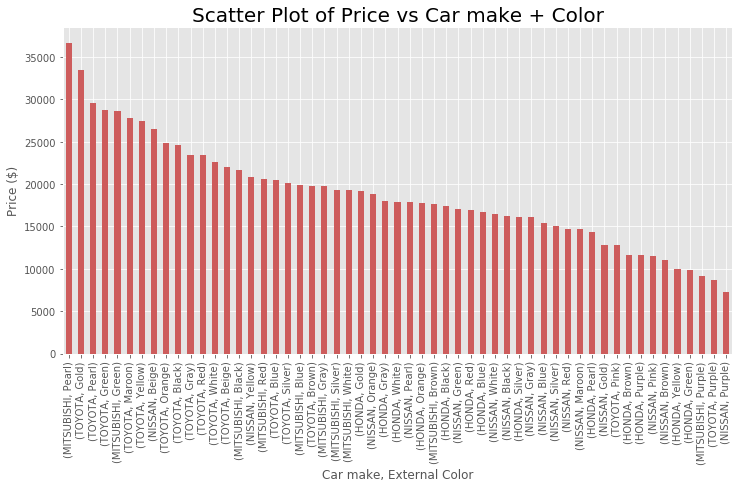

In [69]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'external color'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, External Color')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make + Color', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Registration Year')

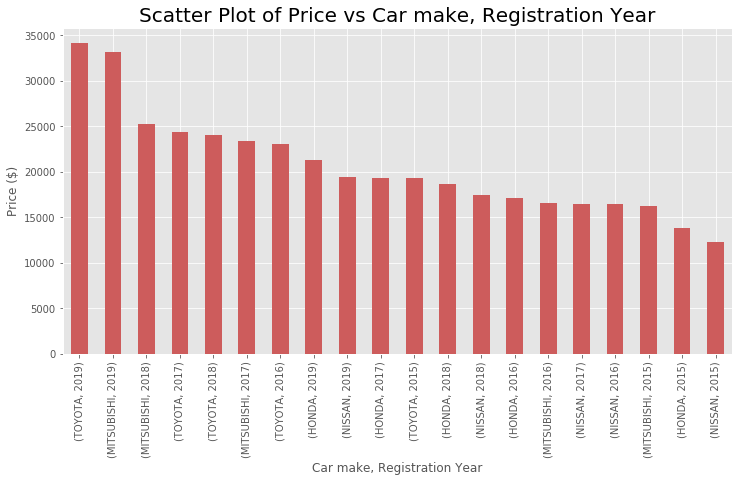

In [70]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'registration_year'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, Registration Year')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Registration Year', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Steering')

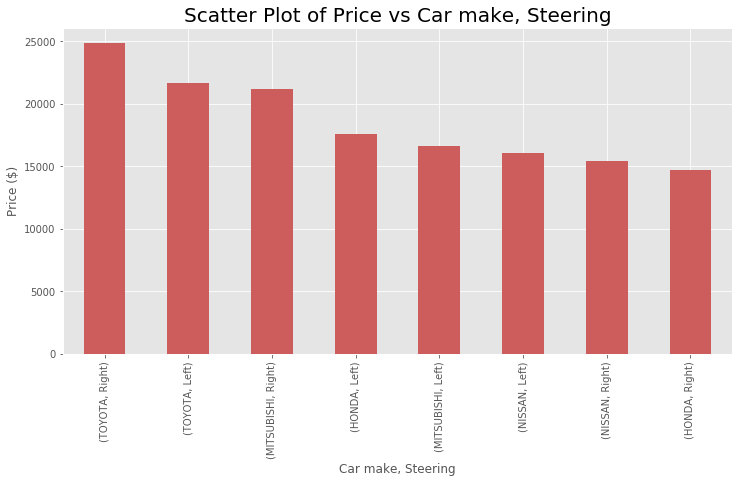

In [71]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'steering'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, Steering')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Steering', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Drive')

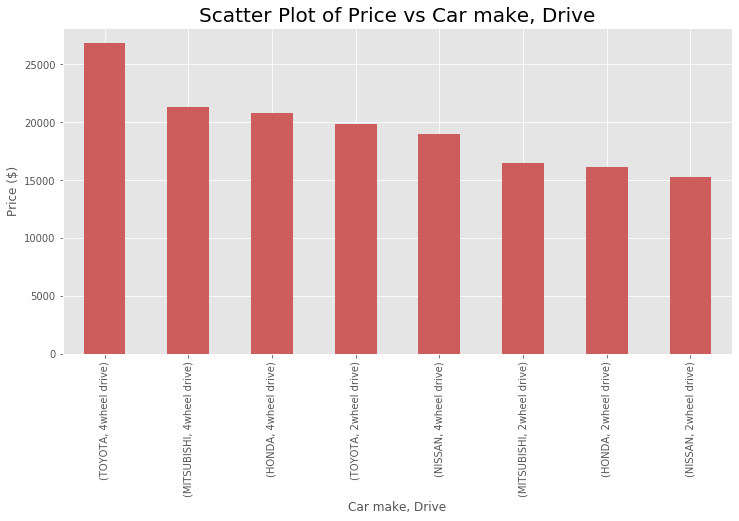

In [72]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'drive'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, Drive')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Drive', fontsize=20)

Text(0.5, 1.0, 'Scatter Plot of Price vs Car make, Transmission')

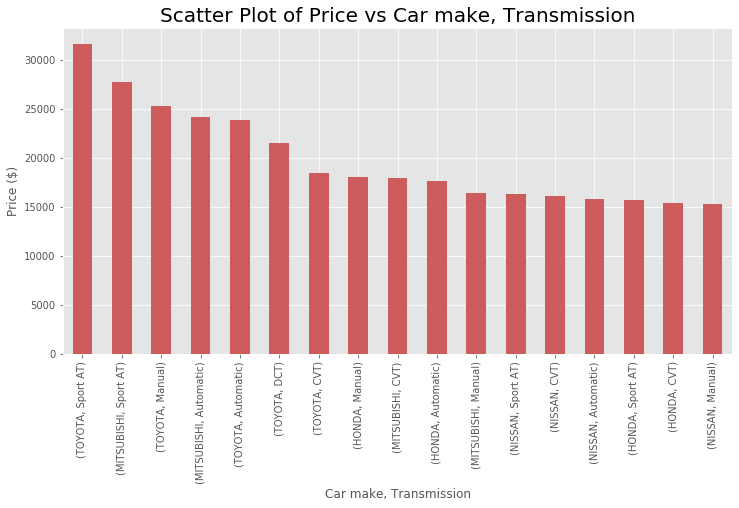

In [73]:
plt.figure(figsize=(12,6))
df_clean.groupby(['makes', 'transmission'])['price'].median().sort_values(ascending = False).plot.bar(color='#CD5C5C')
plt.xlabel('Car make, Transmission')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs Car make, Transmission', fontsize=20)

In [76]:
dg = df_clean.groupby('external color').agg({'car make':'count', 'price':'median'})
dg

,car make,price
external color,,
Beige,3,22098.0
Black,659,20200.0
Blue,221,17700.0
Brown,72,17649.5
Gold,6,25559.5
Gray,397,19819.0
Green,25,18700.0
Maroon,10,21754.0
Orange,4,18850.0


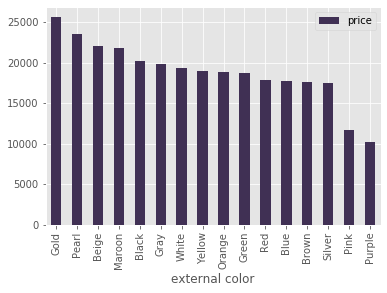

In [77]:
# dg[dg.price > 20000].sort_values(ascending=False, by='price').plot(kind='bar', y='price', color='#403054')
dg.sort_values(ascending=False, by='price').plot(kind='bar', y='price', color='#403054')

Text(0.5, 1, 'Comparison of engine capacity (cc) vs price ($)')

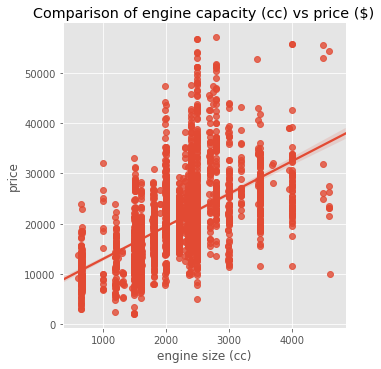

In [96]:
sns.lmplot("engine size (cc)", "price", scatter_engine_df)
ax = plt.gca()
ax.set_title("Comparison of engine capacity (cc) vs price ($)")

Text(0.5, 1, 'Comparison of mileage (km) vs price ($)')

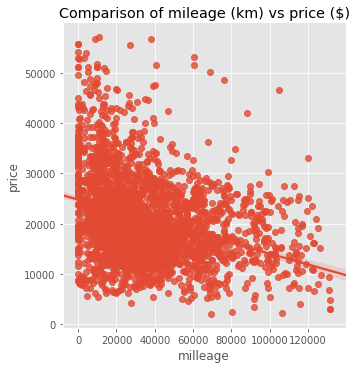

In [97]:
sns.lmplot("milleage", "price", scatter_df)
ax = plt.gca()
ax.set_title("Comparison of mileage (km) vs price ($)")

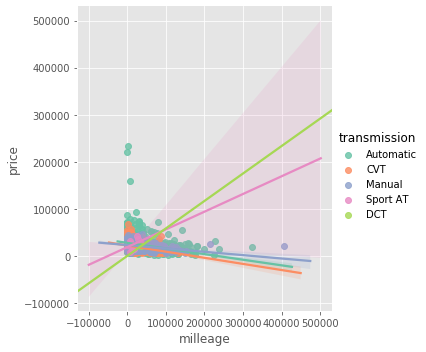

In [136]:
sns.lmplot("milleage", "price", df_clean, hue="transmission", palette="Set2")

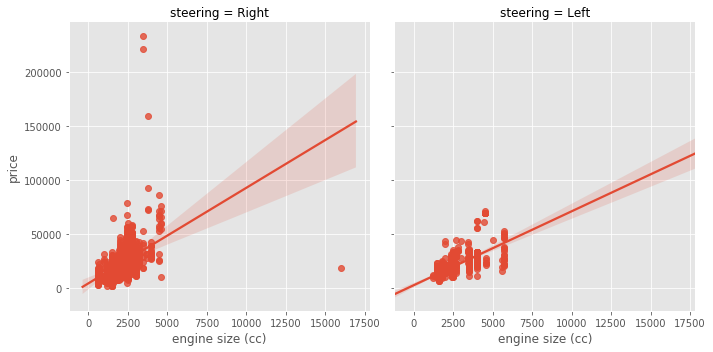

In [99]:
sns.lmplot("engine size (cc)", "price", df_clean, col="steering", palette="Set2")

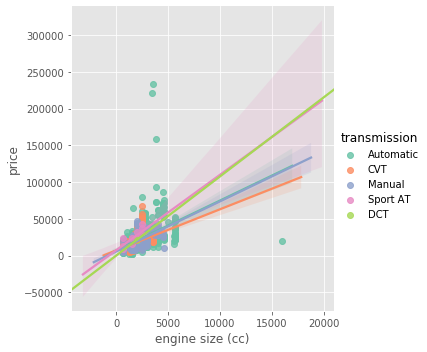

In [100]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="transmission", palette="Set2")

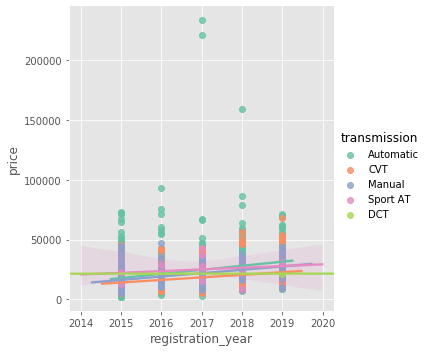

In [101]:
sns.lmplot("registration_year", "price", df_clean, hue="transmission", palette="Set2")

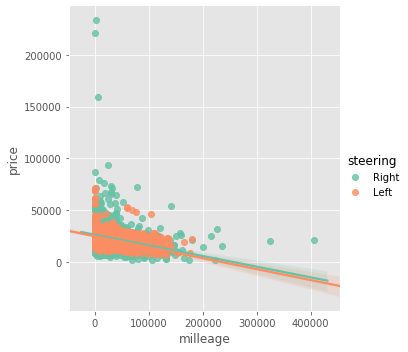

In [102]:
sns.lmplot("milleage", "price", df_clean, hue="steering", palette="Set2")

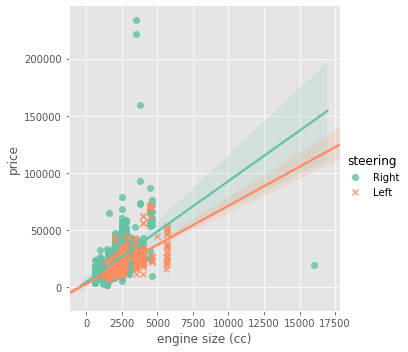

In [103]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="steering",  markers= ["o", "x"], palette="Set2")

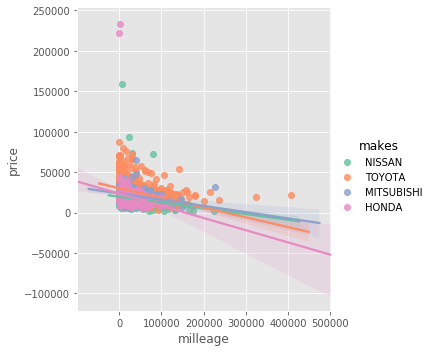

In [104]:
sns.lmplot("milleage", "price", df_clean, hue="makes", palette="Set2")

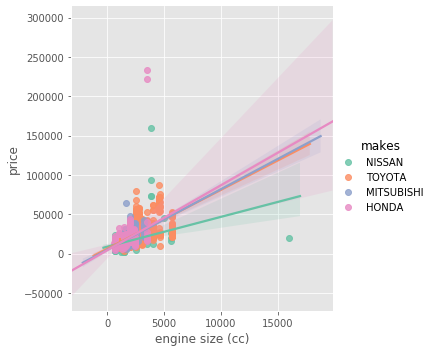

In [105]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="makes", palette="Set2")

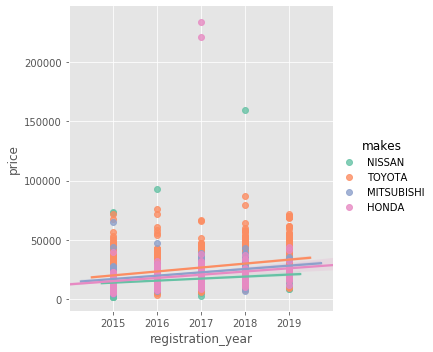

In [106]:
sns.lmplot("registration_year", "price", df_clean, hue="makes", palette="Set2")

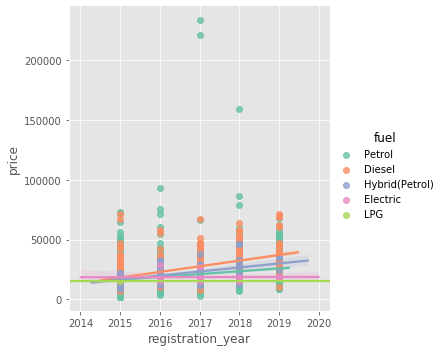

In [107]:
sns.lmplot("registration_year", "price", df_clean, hue="fuel", palette="Set2")

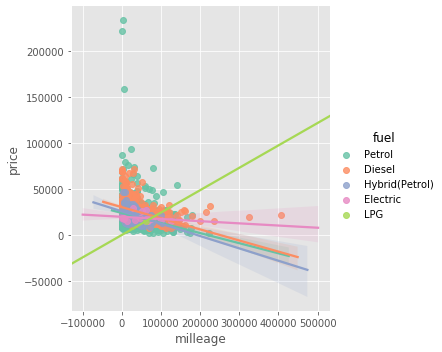

In [108]:
sns.lmplot("milleage", "price", df_clean, hue="fuel", palette="Set2")

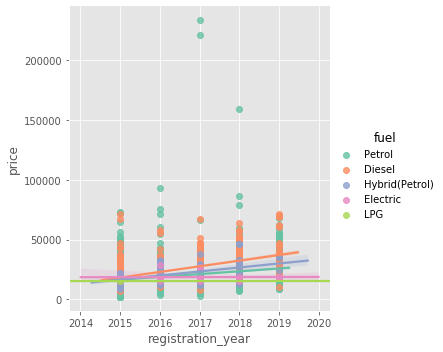

In [109]:
sns.lmplot("registration_year", "price", df_clean, hue="fuel", palette="Set2")

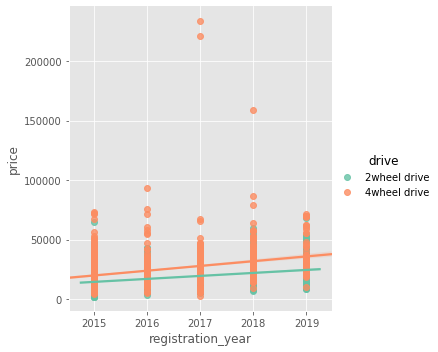

In [110]:
sns.lmplot("registration_year", "price", df_clean, hue="drive", palette="Set2")

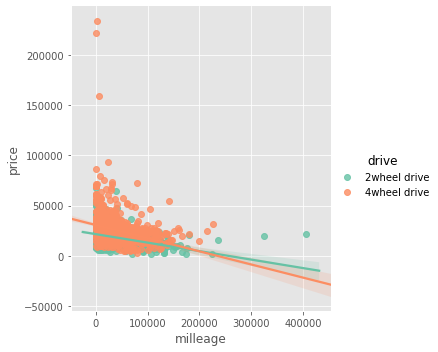

In [111]:
sns.lmplot("milleage", "price", df_clean, hue="drive", palette="Set2")

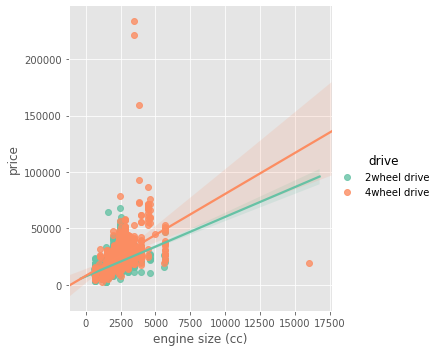

In [112]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="drive", palette="Set2")

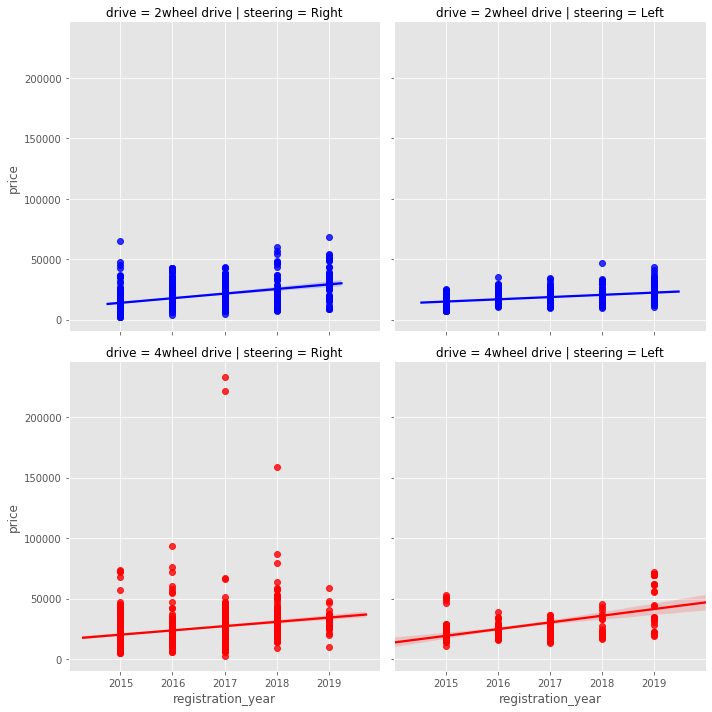

In [114]:
sns.lmplot("registration_year", "price", df_clean, hue="drive", palette={"2wheel drive": "b", "4wheel drive": "r"}, col='steering', row='drive')

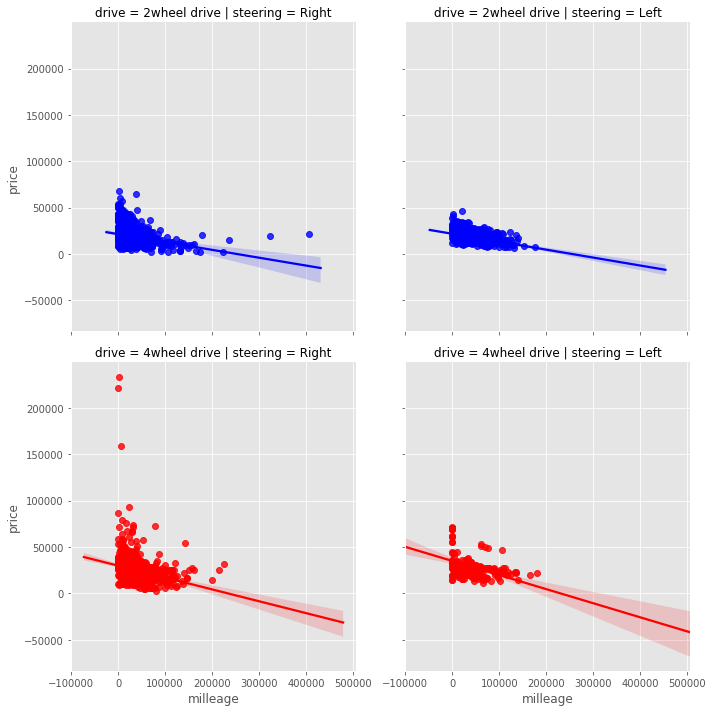

In [138]:
sns.lmplot("milleage", "price", df_clean, hue="drive", palette={"2wheel drive": "b", "4wheel drive": "r"}, col='steering', row='drive')



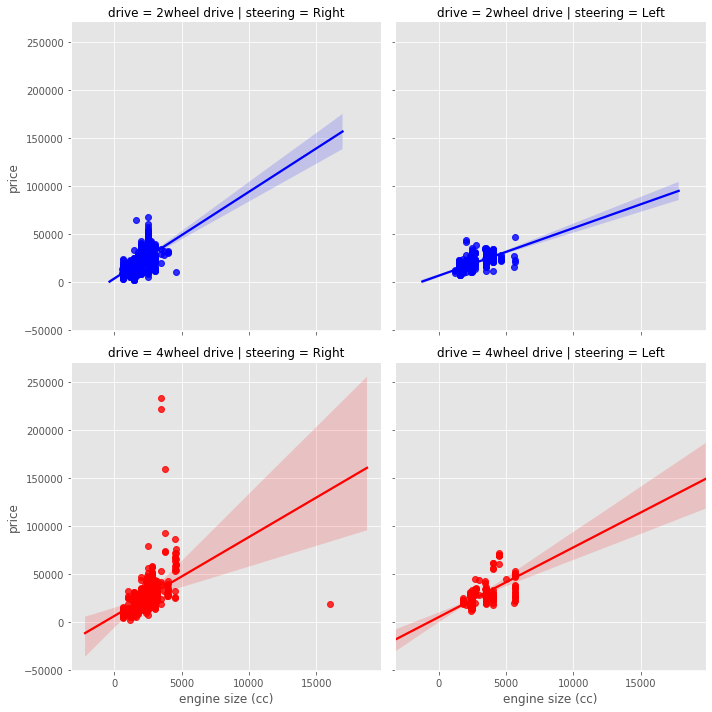

In [116]:
sns.lmplot("engine size (cc)", "price", df_clean, hue="drive", palette={"2wheel drive": "b", "4wheel drive": "r"}, col='steering', row='drive')



/Users/babu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


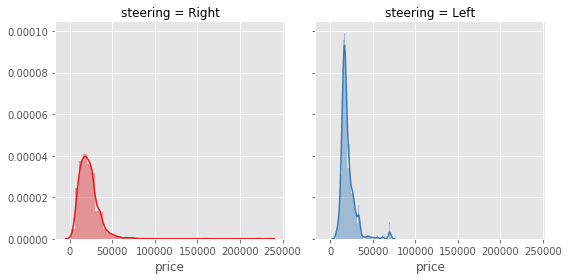

In [119]:
ColorGrid = sns.FacetGrid(df_clean, col='steering', hue="steering", palette="Set1", size=4)
ColorGrid.map(sns.distplot, "price")

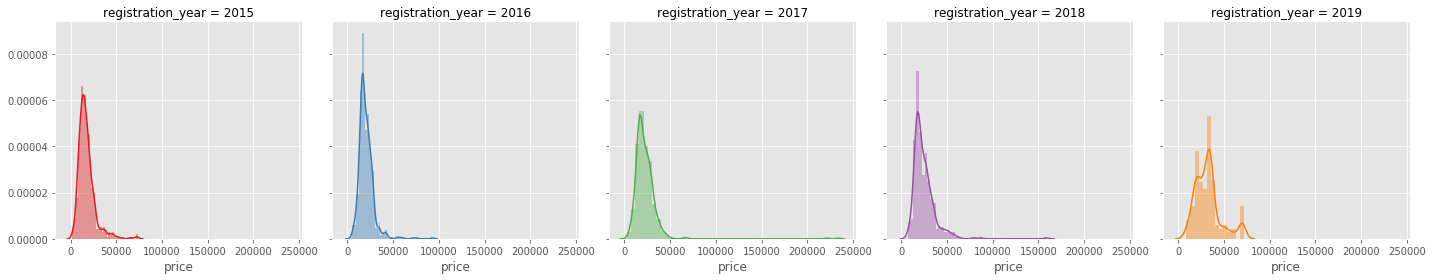

In [120]:
ColorGrid = sns.FacetGrid(df_clean, col='registration_year', hue="registration_year", palette="Set1", size=4)
ColorGrid.map(sns.distplot, "price")

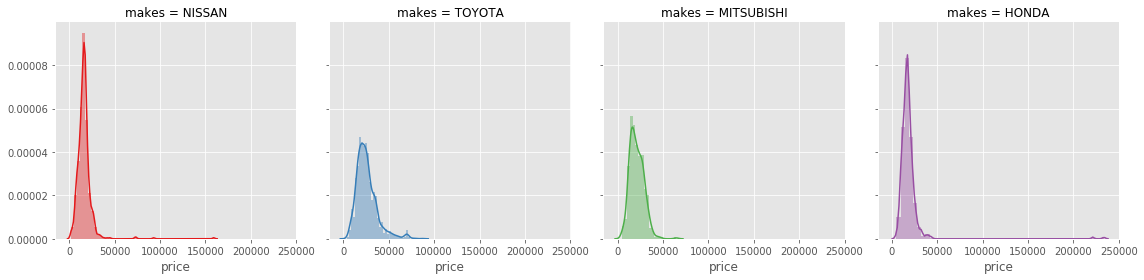

In [121]:
ColorGrid = sns.FacetGrid(df_clean, col='makes', hue="makes", palette="Set1", size=4)
ColorGrid.map(sns.distplot, "price")

In [122]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

In [124]:
# df_clean_makes = df_clean.loc[df['makes'] == 'TOYOTA']['price']

# df_clean_make = df_clean.loc['makes']['price']
# comedy_imdb = df_genre.loc[df_genre.genres=='Comedy']['imdb_score']

# or
groups = df_clean[['makes','registration_year']].groupby('makes')
toyota_price = groups.get_group('TOYOTA').registration_year
nissan_price = groups.get_group('NISSAN').registration_year
honda_price = groups.get_group('HONDA').registration_year
mitsubishi_price = groups.get_group('MITSUBISHI').registration_year

getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':0.5}

trace0 = Histogram(x=toyota_price,
                   name='Toyota',
                   xbins=getbins(toyota_price))

trace1 = Histogram(x=nissan_price,
                   name='Nissan',
                   xbins=getbins(nissan_price))

trace2 = Histogram(x=honda_price,
                   name='Honda',
                   xbins=getbins(honda_price))

trace3 = Histogram(x=mitsubishi_price,
                   name='Mitsubishi',
                   xbins=getbins(mitsubishi_price))

data = [trace0, trace1, trace2, trace3]

layout = Layout(title="Histogram of Toyota, Nissan Prices",
               bargroupgap=0.1)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [134]:
from plotly.graph_objs import Bar

location_df = df_clean.groupby('external color')['price'].median().sort_values(ascending=False).reset_index()

data = [Bar(x=location_df['external color'], y=location_df['price'], text=location_df['external color'])]
layout = Layout(title="Locations with Highest Median Price")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

In [128]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(df_clean['car make']))

In [129]:
df_clean.columns

Index(['car make', 'location', 'chassis no', 'model code', 'milleage',
       'engine size (cc)', 'engine code', 'drive', 'steering', 'transmission',
       'external color', 'registration_year', 'fuel', 'manufacture_year',
       'price', 'makes'],
      dtype='object')

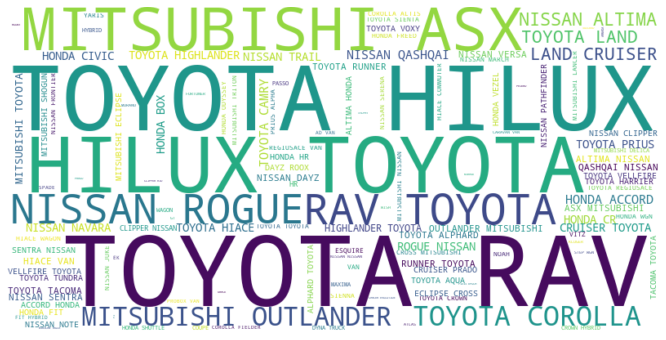

In [130]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()